# Opgave DBSCAN

In deze opgave gaan we voor de verandering werken met de iris-dataset. We hebben hiervoor gekozen omdat het een fijne kleine en overzichtelijke dataset is en omdat deze inmiddels al voldoende is toegelicht.

Omdat we nu unsupervised te werk gaan, maken we geen gebruik van de `y`-vector. We willen kijken of we een [DBSCAN-model](https://scikit-learn.org/stable/modules/clustering.html#dbscan) kunnen maken dat de data in verschillende klassen kan classificeren. Om deze classificatie inzichtelijk te maken, hebben we een hulpfunctie `plot_dbscan` gemaakt, die je hieronder ziet staan. Bestudeer eventueel deze code om een beeld te krijgen van hoe hij werkt en wat de bedoeling is.

Run de onderstaande cel om de noodzakelijke imports uit te voeren.

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

Run de onderstaande cel om de methode `plot_dbscan` te definiëren.

In [2]:
def plot_dbscan(model, X, **labels):
    core_mask = np.zeros_like(model.labels_, dtype=bool)
    core_mask[model.core_sample_indices_] = True
    anomalies_mask = model.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = model.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=model.labels_[core_mask], marker='o', s=100, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], c=model.labels_[core_mask], marker='^', s=20, label='klasse')
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100, label='uitbijter')
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=model.labels_[non_core_mask], marker=".", label='non-core')
    
    x_str = '$x_1$' if not 'xlabel' in labels else labels['xlabel']
    y_str = '$x_2$' if not 'ylabel' in labels else labels['ylabel']
    plt.xlabel(x_str, fontsize=14)
    plt.ylabel(y_str, fontsize=14)
    plt.legend()
    plt.title(f"eps={model.eps:.2f}, min_samples={model.min_samples}", fontsize=14)

Laad de iris-dataset van uit `sklearn-datasets`. Zoals tijdens het theoriecollege is toegelicht zijn &epsilon; (`eps`) en het aantal samples in de omgeving van het gekozen datapunt de belangrijkste parameters van DBSCAN. Maak verschillende modellen met (in ieder geval) de onderstaande waarden voor deze parameters. Maak telkens een plot en registreer het aantal klassen, uitbijters en non-core observaties.

```
  min_samples: [3, 4, 5, 7, 9]
  eps{ [.1, .4, .55, .6, 1, 2]
```

Maak vervolgens een interessante visualisatie van deze gegevens om inzichtelijk te krijgen wat de effecten van de verschillende waarden voor deze parameters zijn. Kun je verklaren wat er gebeurt?

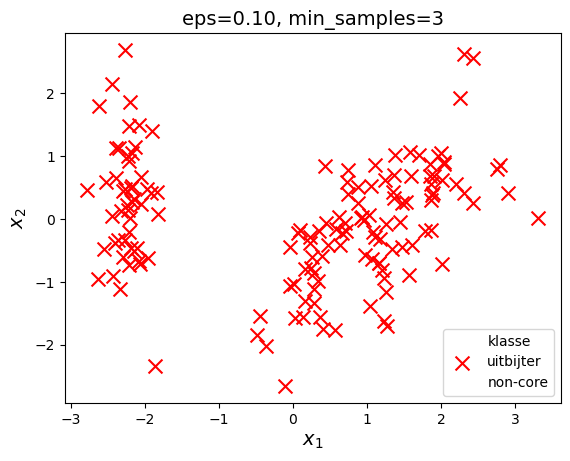

Number of clusters: 0
Number of outliers: 150


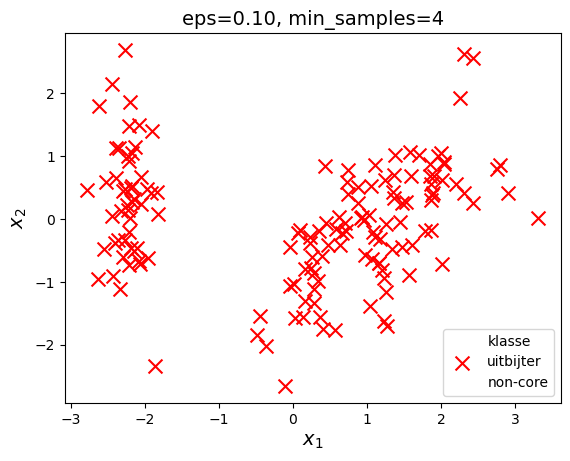

Number of clusters: 0
Number of outliers: 150


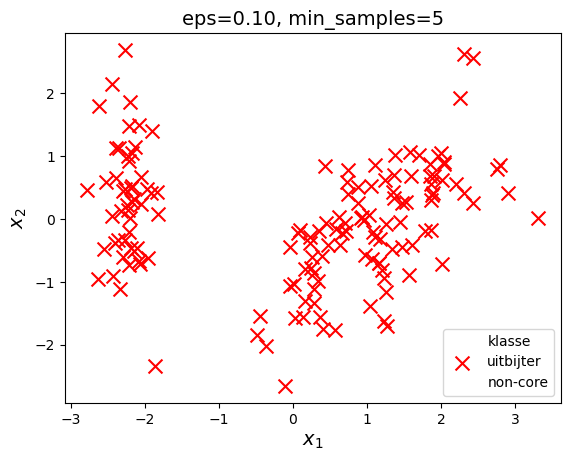

Number of clusters: 0
Number of outliers: 150


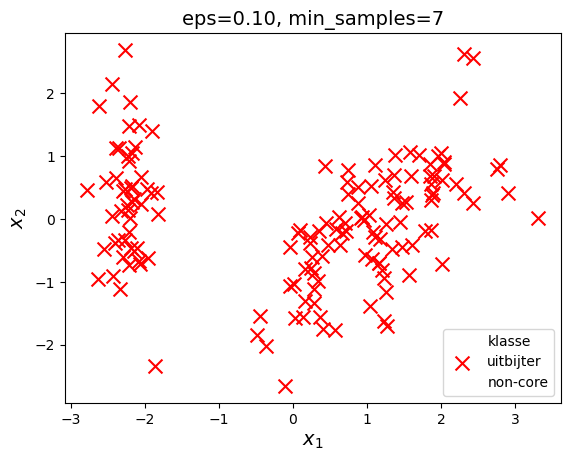

Number of clusters: 0
Number of outliers: 150


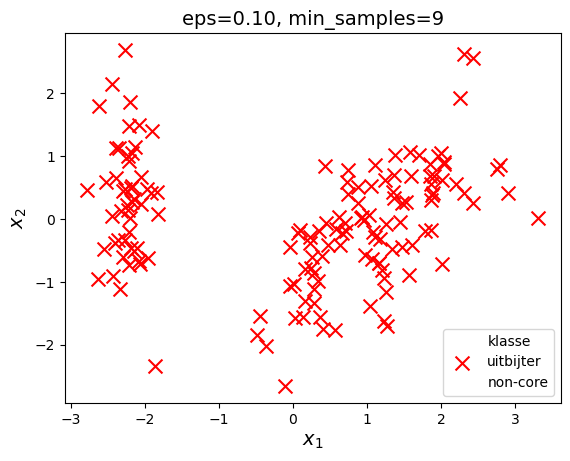

Number of clusters: 0
Number of outliers: 150


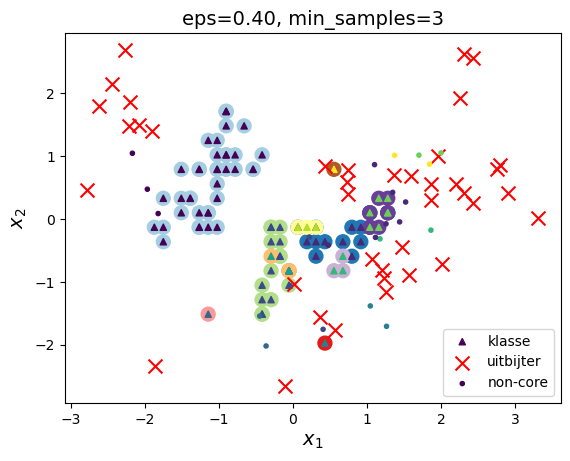

Number of clusters: 10
Number of outliers: 39


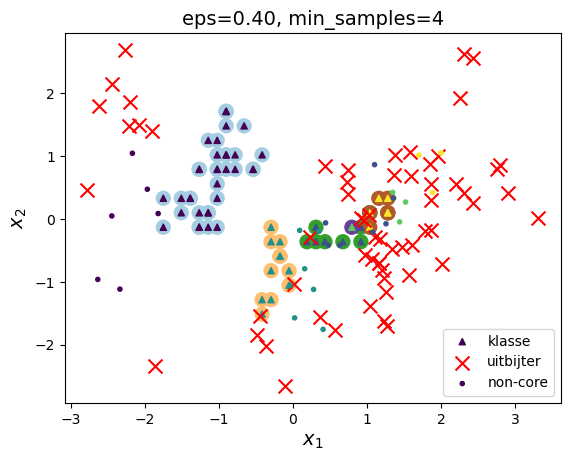

Number of clusters: 5
Number of outliers: 61


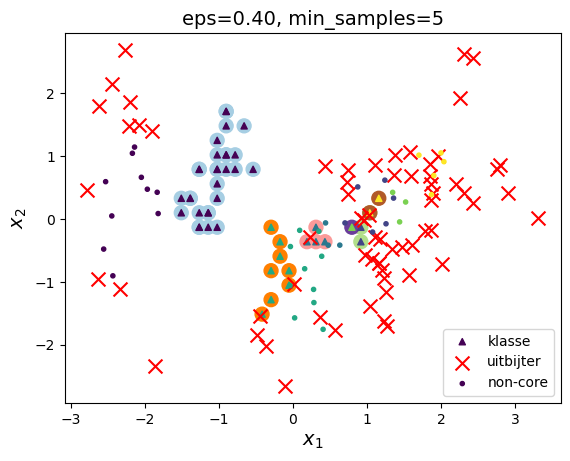

Number of clusters: 6
Number of outliers: 66


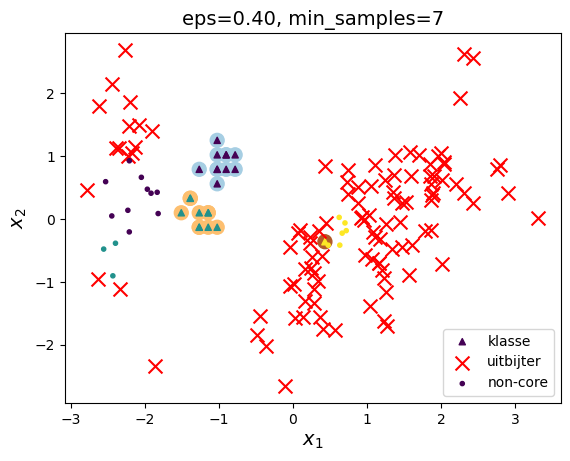

Number of clusters: 3
Number of outliers: 109


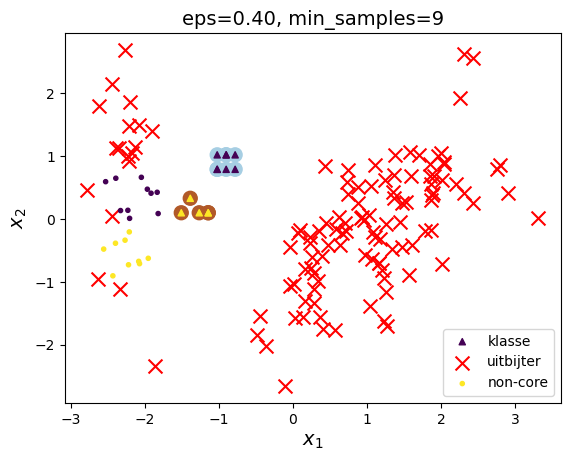

Number of clusters: 2
Number of outliers: 118


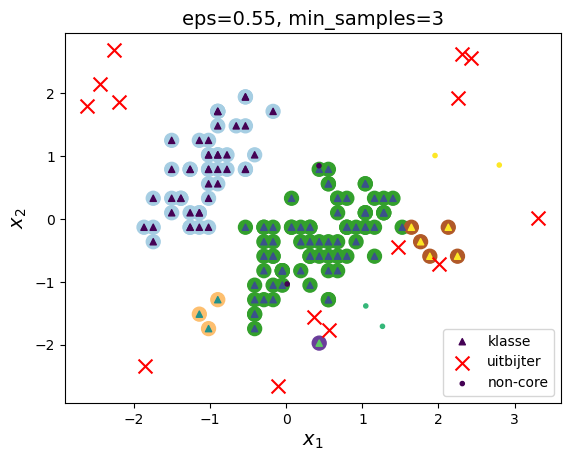

Number of clusters: 5
Number of outliers: 14


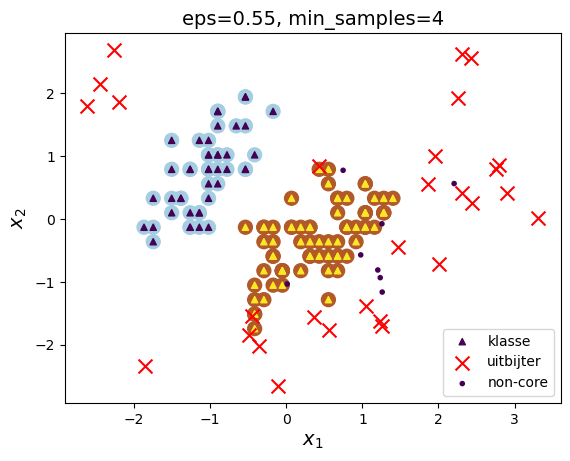

Number of clusters: 2
Number of outliers: 28


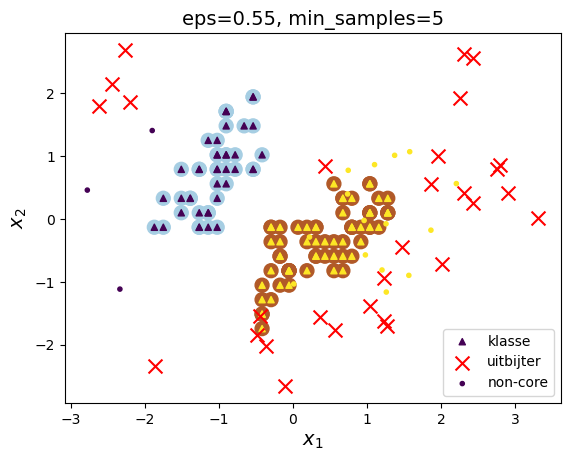

Number of clusters: 2
Number of outliers: 29


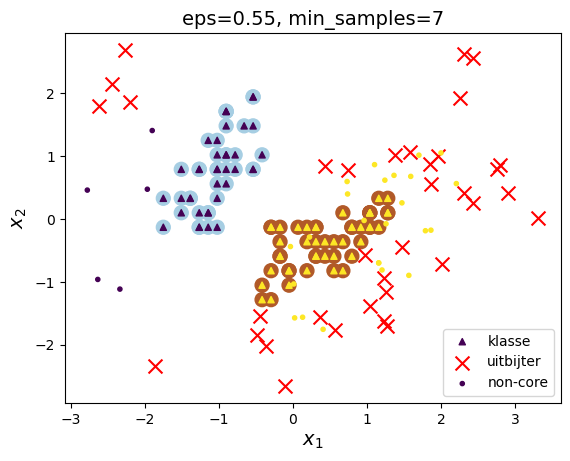

Number of clusters: 2
Number of outliers: 35


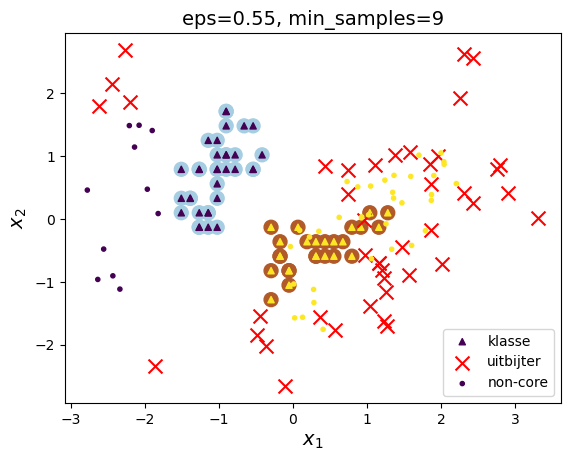

Number of clusters: 2
Number of outliers: 43


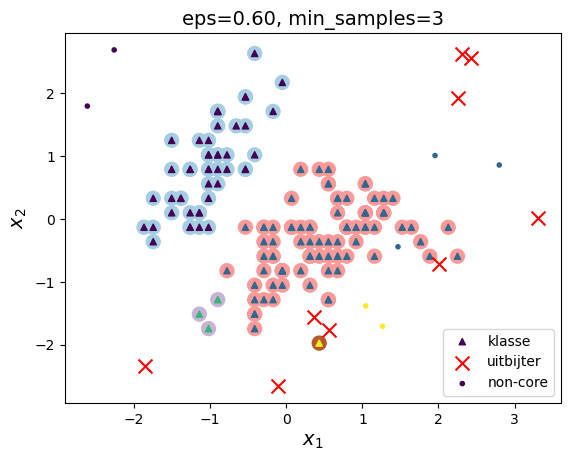

Number of clusters: 4
Number of outliers: 9


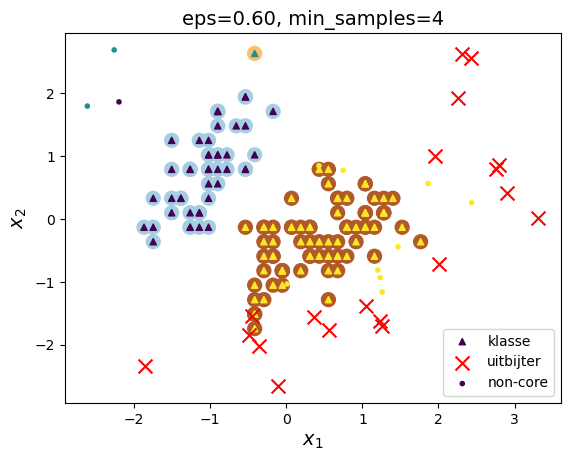

Number of clusters: 3
Number of outliers: 19


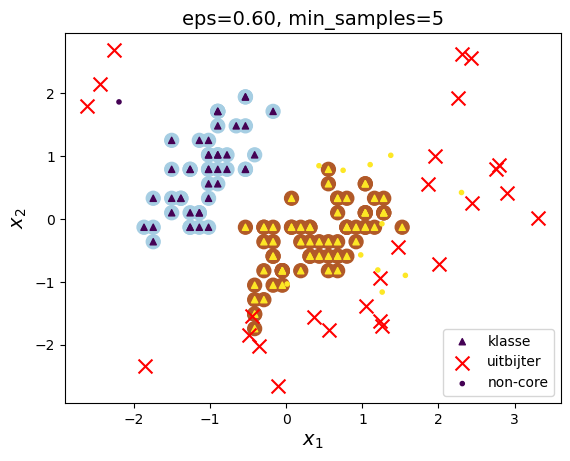

Number of clusters: 2
Number of outliers: 26


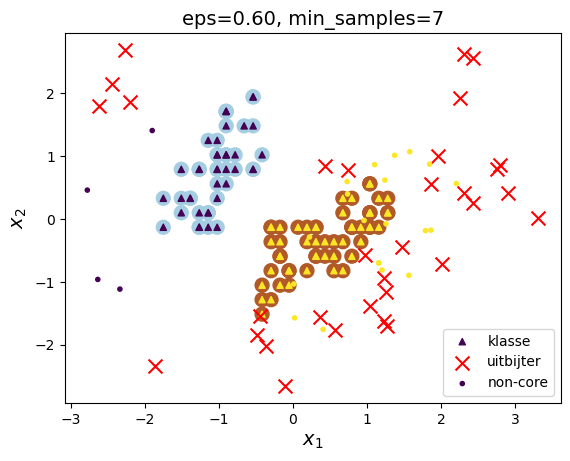

Number of clusters: 2
Number of outliers: 32


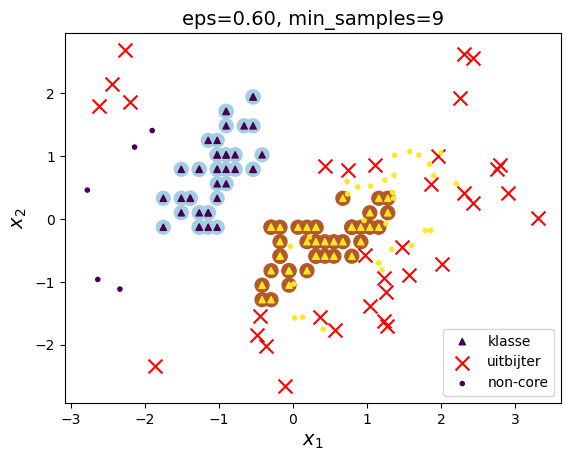

Number of clusters: 2
Number of outliers: 34


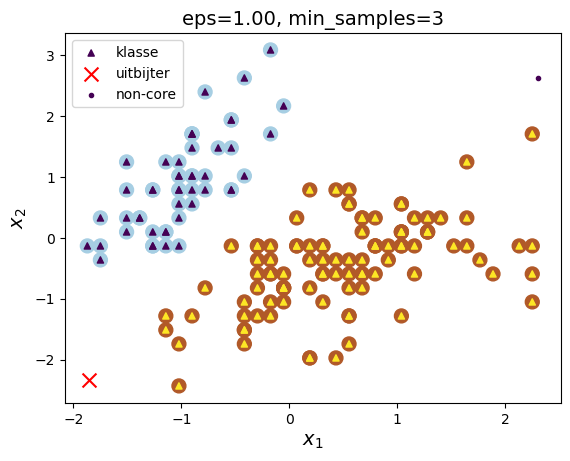

Number of clusters: 2
Number of outliers: 1


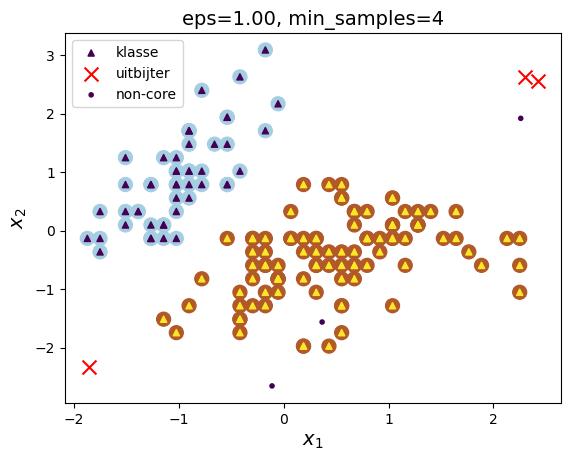

Number of clusters: 2
Number of outliers: 3


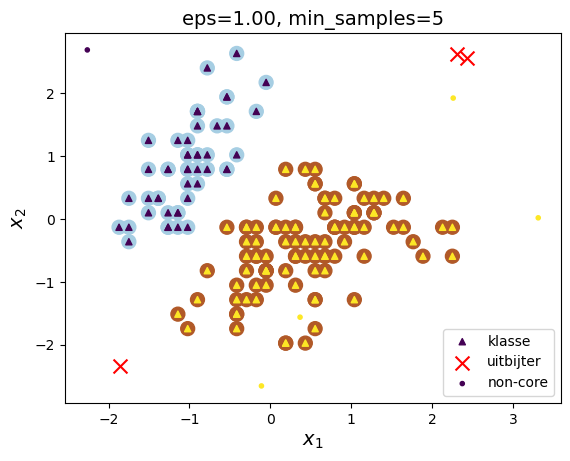

Number of clusters: 2
Number of outliers: 3


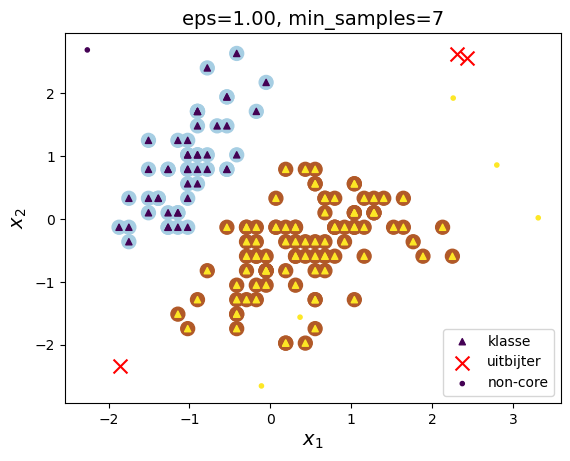

Number of clusters: 2
Number of outliers: 3


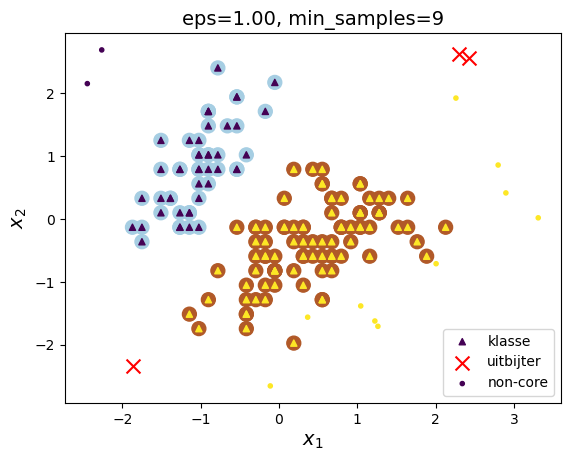

Number of clusters: 2
Number of outliers: 3


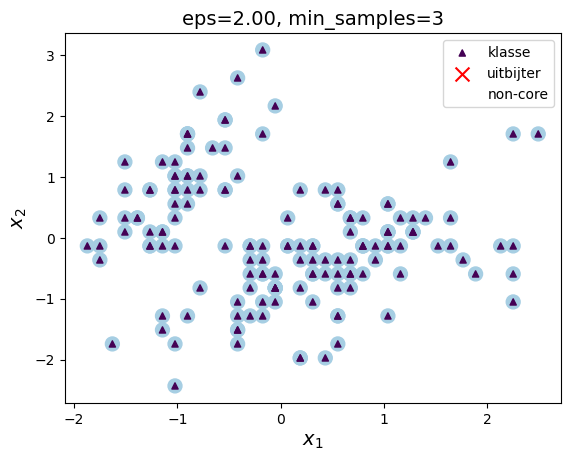

Number of clusters: 1
Number of outliers: 0


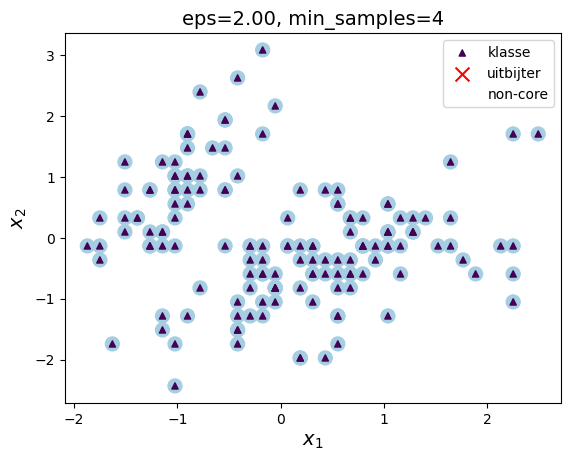

Number of clusters: 1
Number of outliers: 0


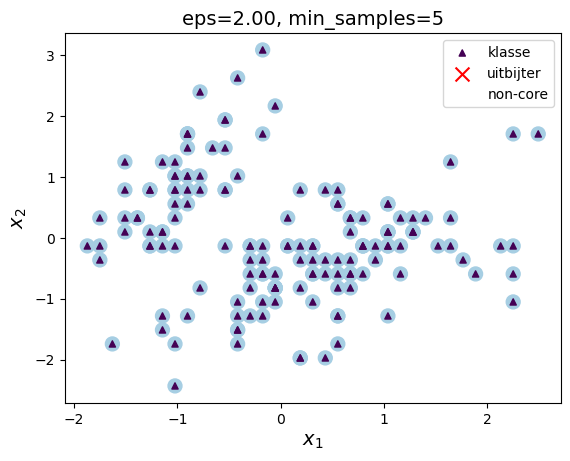

Number of clusters: 1
Number of outliers: 0


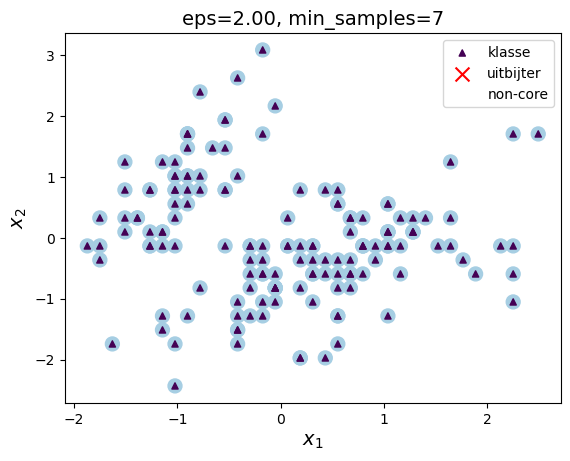

Number of clusters: 1
Number of outliers: 0


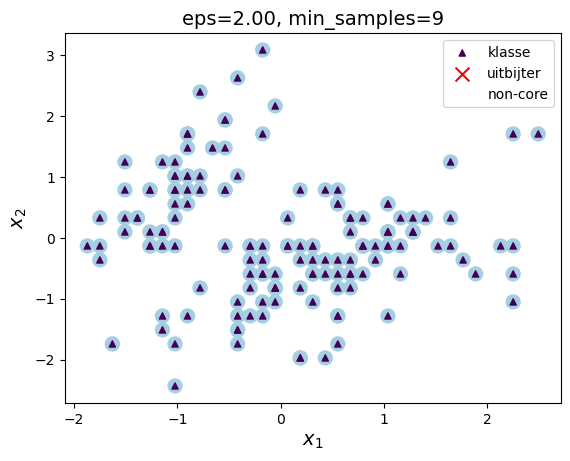

Number of clusters: 1
Number of outliers: 0


In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data 

# gem=0 | SD=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA toepassen om de data terug te brengen naar 2 dimensies
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

min_samples_list = [3, 4, 5, 7, 9]
eps_list = [0.1, 0.4, 0.55, 0.6, 1, 2]

for eps in eps_list:
    for min_samples in min_samples_list:
        #model maken en fitten
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_model.fit(X_scaled)  # Gebruik de geschaalde volledige data

        # Bereken aantal clusters
        n_clusters = len(set(dbscan_model.labels_)) - (1 if -1 in dbscan_model.labels_ else 0)
        # Bereken aantal outliers
        n_outliers = np.sum(dbscan_model.labels_ == -1)

        # Plot de clusters en outliers
        plot_dbscan(dbscan_model, X_pca) 
        plt.show()
        print(f"Number of clusters: {n_clusters}")
        print(f"Number of outliers: {n_outliers}")


#epsilon van 1 ziet er erg goed uit, samples maken dan minder veel uit